In [1]:
#Import relevant libraries to perform the functions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the dataset

df=pd.read_csv("titanic.csv")

In [3]:
#Display the first five entries of the dataset

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Determine the size and shape of the dataset

print("The shape of the Titanic data set is:",df.shape)
print("The size of the Titanic data set is:",df.size)

The shape of the Titanic data set is: (891, 12)
The size of the Titanic data set is: 10692


In [5]:
#Provide the information on columns, non-null values and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Identify the null values

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

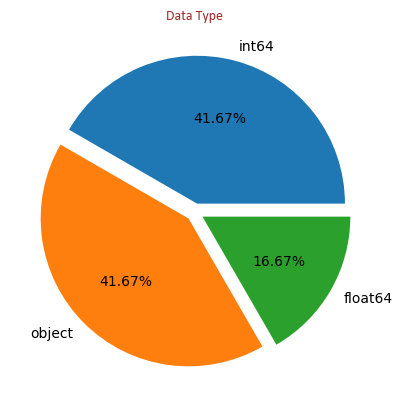

In [7]:
#Pie plot to determine the percentage distribution of datatypes

mlabel=df.dtypes.unique()
plt.pie(df.dtypes.value_counts(),labels=mlabel,explode=[0.06,0.06,0.06],autopct='%1.2f%%',shadow=False)
plt.title('Data Type',color='Brown',loc='center',font='Calibri')
plt.show()

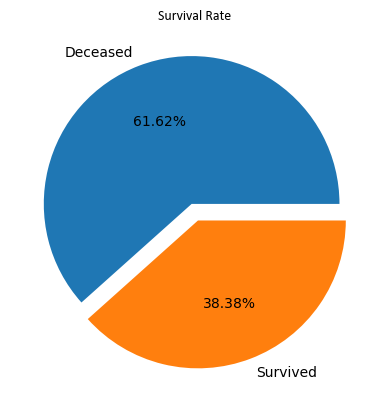

In [8]:
#Pie plot to determine the percentage distribution of surival rate

mlabel1=["Deceased","Survived"]
plt.pie(df["Survived"].value_counts(),labels=mlabel1,explode=[0.06,0.06],autopct='%1.2f%%',shadow=False)
plt.title('Survival Rate',color='Black',loc='center',font='Calibri')
#plt.legend(["Survived - 0","Deceased - 1"])
plt.show()

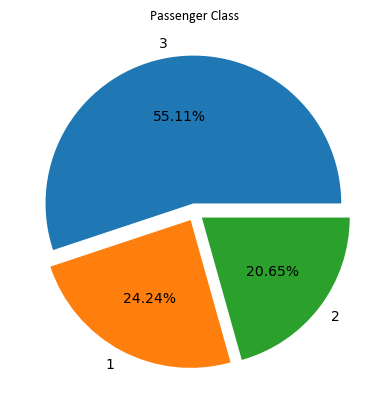

In [9]:
#Pie plot to determine the percentage distribution of Passenger class

mlabel2=df["Pclass"].unique()
plt.pie(df["Pclass"].value_counts(),labels=mlabel2,explode=[0.06,0.06,0.06],autopct='%1.2f%%',shadow=False)
plt.title('Passenger Class',color='Black',loc='center',font='Calibri')
#plt.legend(["Survived - 0","Deceased - 1"])
plt.show()

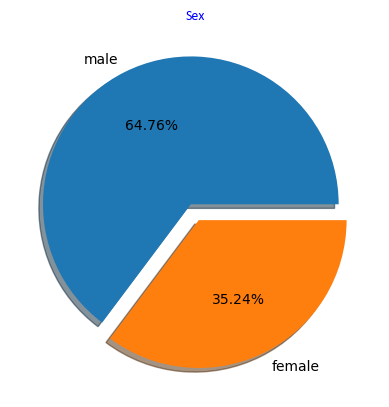

In [10]:
#Pie plot to determine the percentage distribution of Gender

mlabel3=df["Sex"].unique()
plt.pie(df["Sex"].value_counts(),labels=mlabel3,explode=[0.06,0.06],autopct='%1.2f%%',shadow=True)
plt.title('Sex',color='Blue',loc='center',font='Calibri')
plt.show()

In [11]:
#Determine the correlation within the attributes

df.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000,-0.005,-0.035,0.037,-0.058,-0.002,0.013
Survived,-0.005,1.000,-0.338,-0.077,-0.035,0.082,0.257
Pclass,-0.035,-0.338,1.000,-0.369,0.083,0.018,-0.549
Age,0.037,-0.077,-0.369,1.000,-0.308,-0.189,0.096
SibSp,-0.058,-0.035,0.083,-0.308,1.000,0.415,0.160
Parch,-0.002,0.082,0.018,-0.189,0.415,1.000,0.216
Fare,0.013,0.257,-0.549,0.096,0.160,0.216,1.000


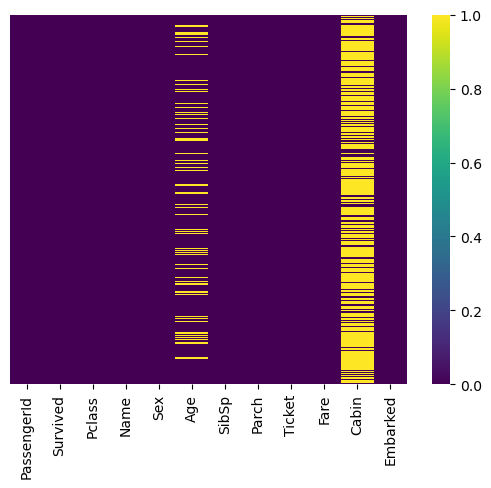

In [12]:
#Pictorial representation to identify the missing values

sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap="viridis");

In [13]:
#Create the function to determine the missing fields and its percentage

def missingvalue(mv):
    missing_number=mv.isnull().sum().sort_values(ascending=False)[mv.isnull().sum().sort_values(ascending=False)!=0]
    missing_percent=round((mv.isnull().sum()/mv.isnull().count())*100,2)[round((mv.isnull().sum()/mv.isnull().count())*100,2)!=0]
    missing=pd.concat([missing_number,missing_percent],axis=1,keys=['Missing number','Missing percentage'])
    return missing    

In [14]:
#Call the function to display the missing fields and its percentage

missingvalue(df).style.background_gradient(cmap='coolwarm').set_precision(2)

,Missing number,Missing percentage
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


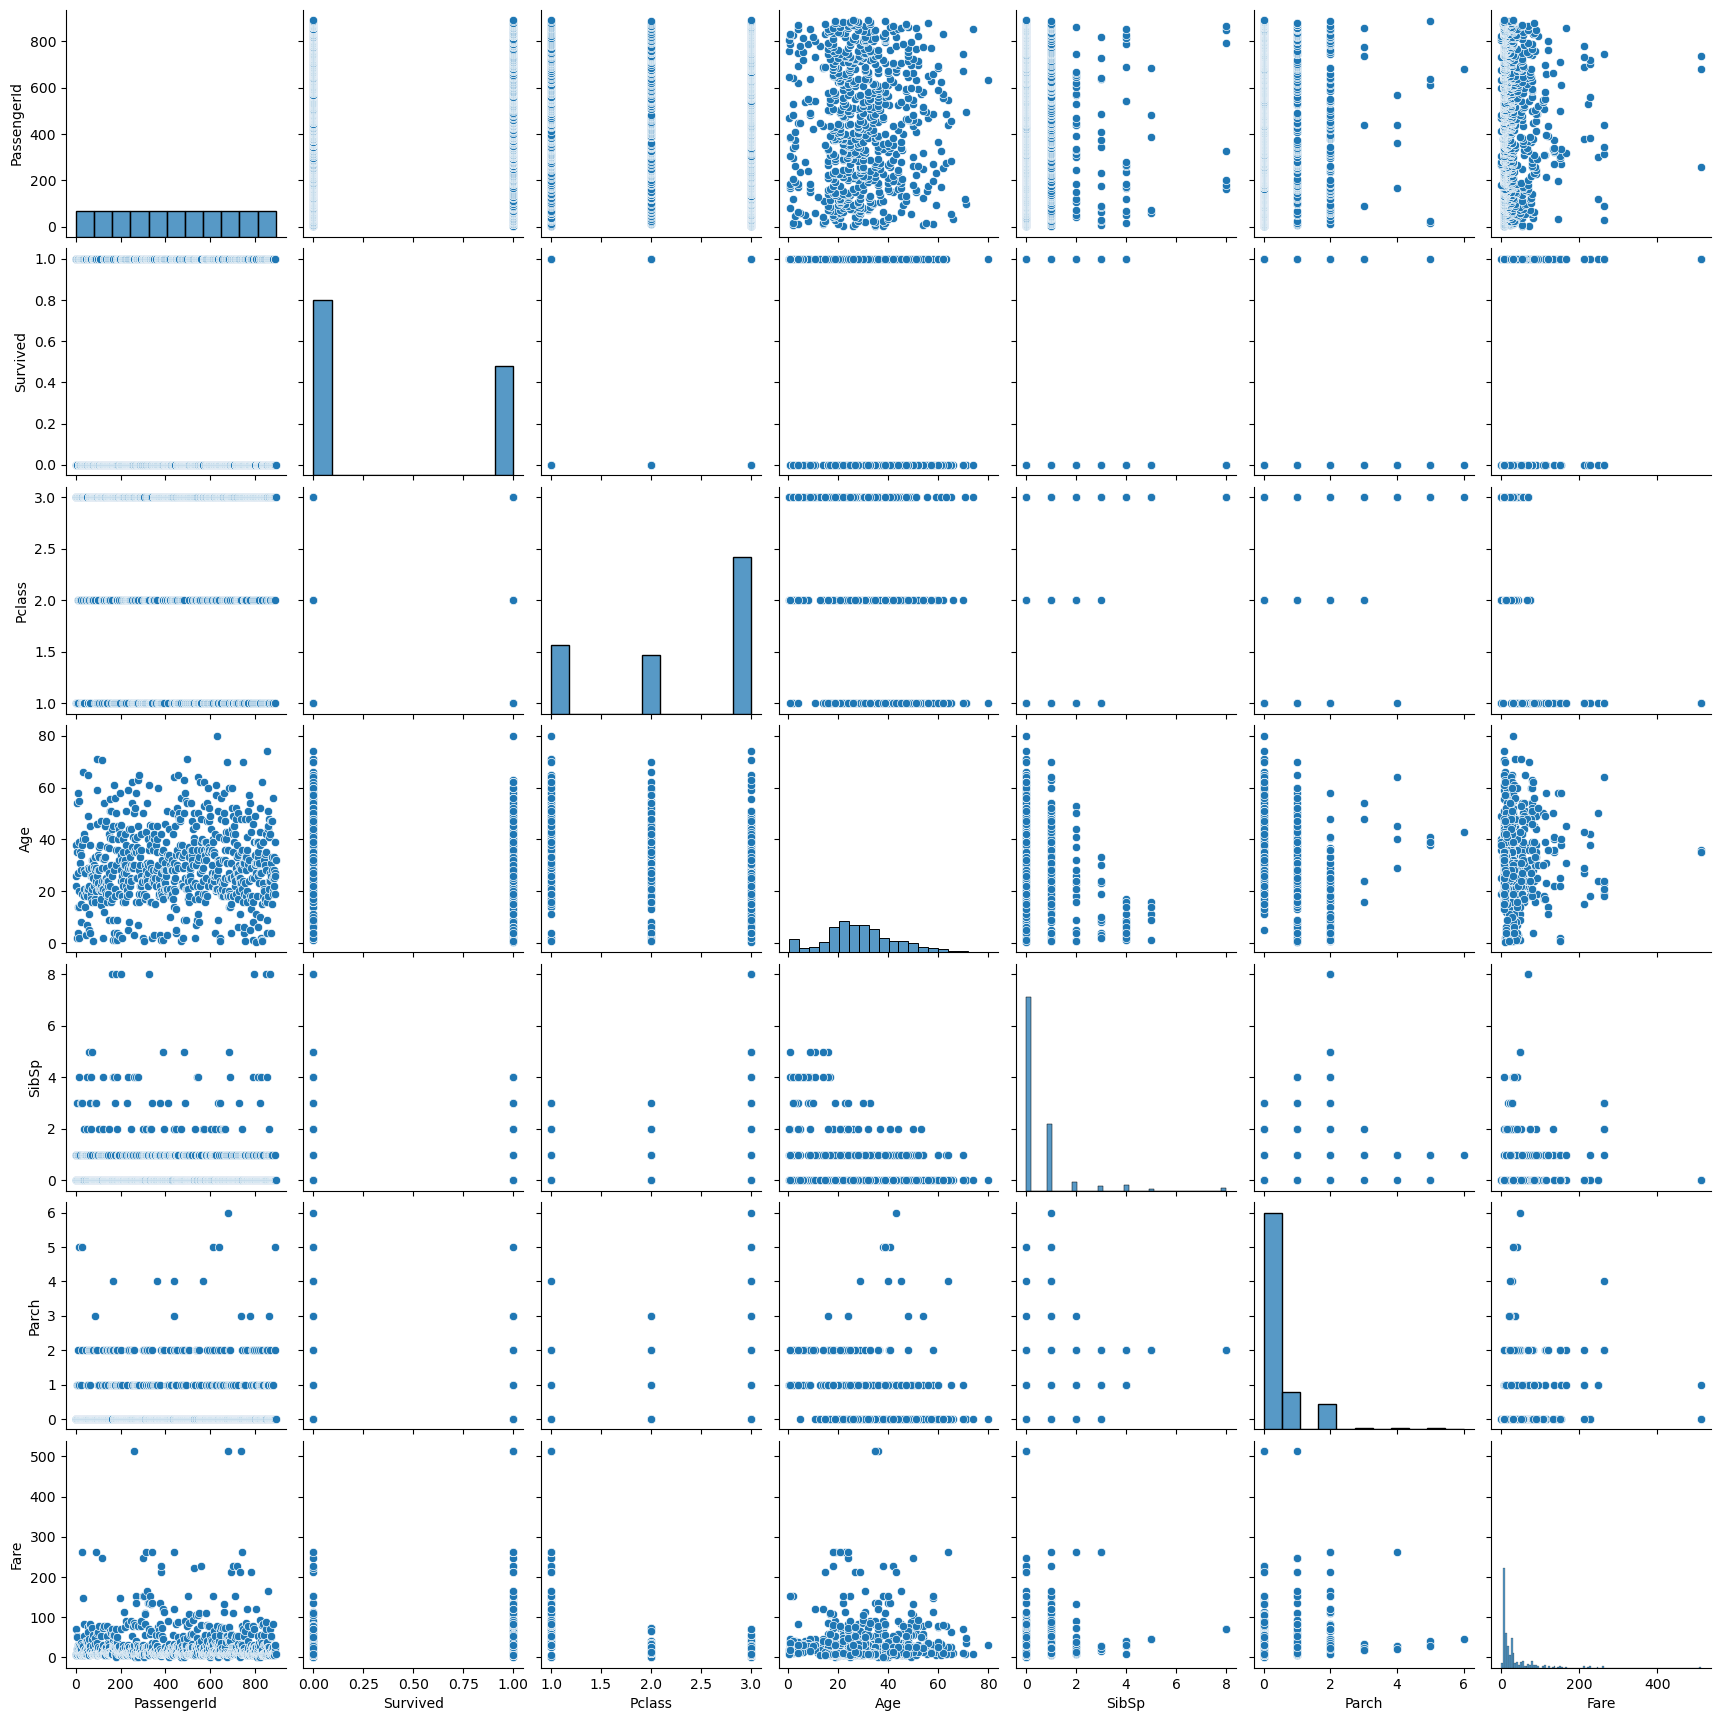

In [15]:
#Analyze the correlation within the attributes using pair plot

sns.pairplot(data=df)
plt.show()

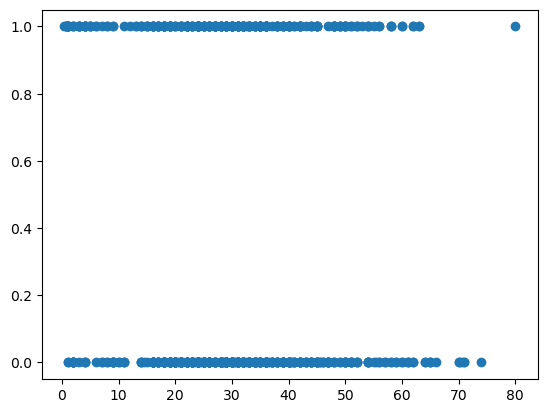

In [16]:
#Analyze the correlation between Age and Survial rate by Scatter plot

plt.scatter(x="Age",y="Survived",data=df)
plt.show()

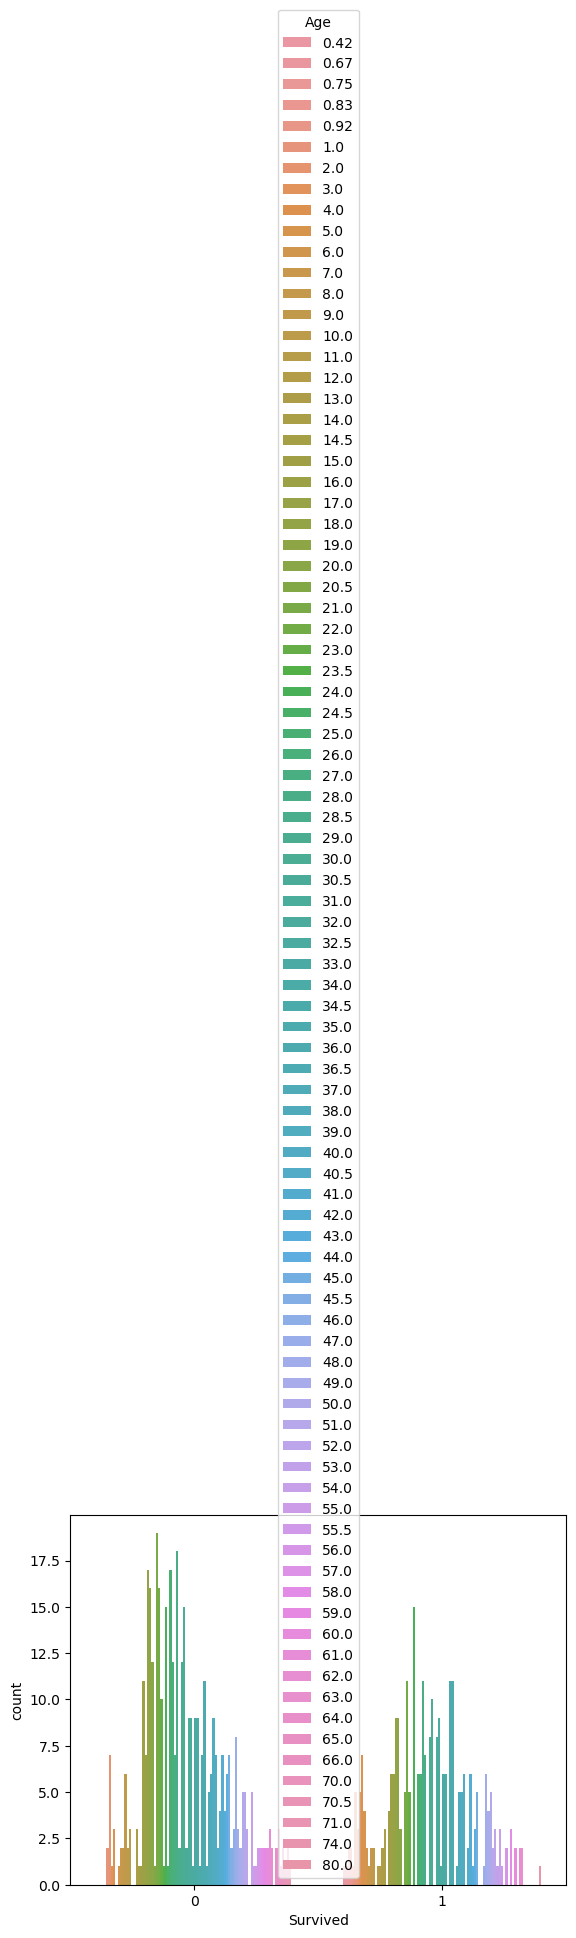

In [17]:
#Analyze the correlation between Survival rate and Age using Count plot

sns.countplot(x="Survived",hue="Age",data=df)
plt.show()

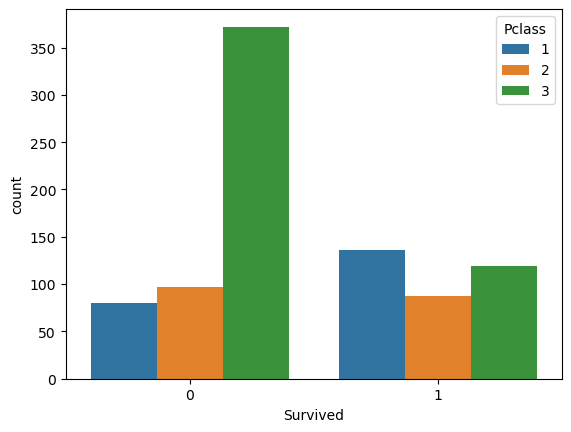

In [18]:
#Analyze the correlation between Passenger class and Survial rate by Scatter plot

sns.countplot(x="Survived",hue="Pclass",data=df)
plt.show()

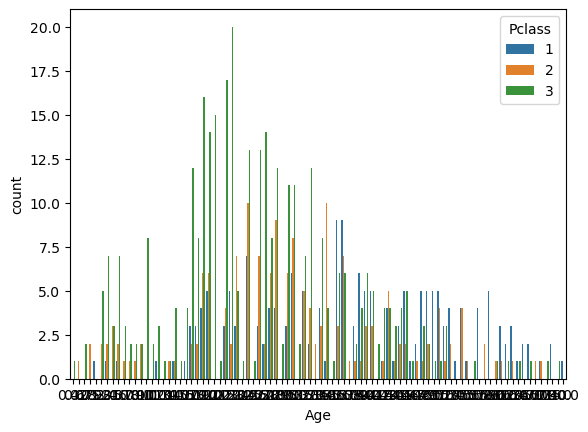

In [19]:
#Analyze the correlation between Age and Passenger class by Count plot


sns.countplot(x="Age",hue="Pclass",data=df)
plt.show()

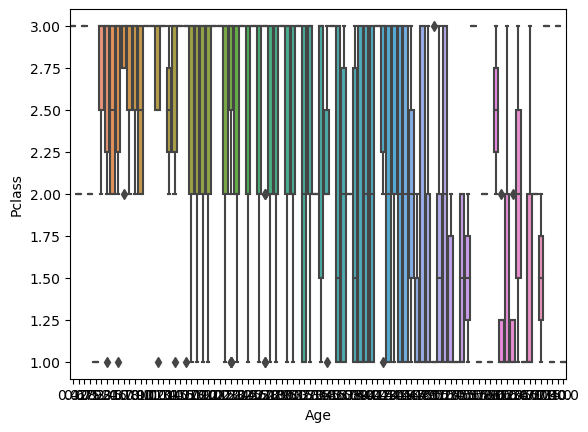

In [20]:
#Analyze correlation between Age and Passenger class and identify outliers by Box plot


sns.boxplot(x="Age",y="Pclass",data=df)
plt.show()

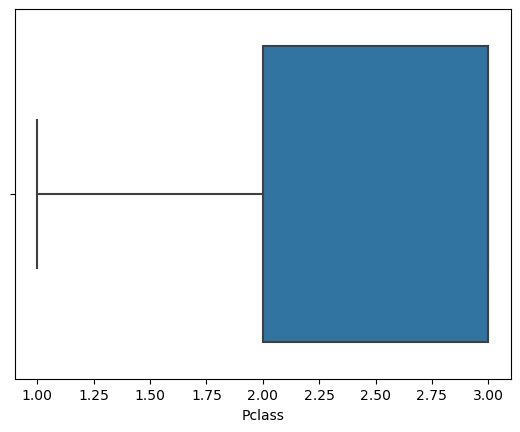

In [21]:
#To identify outliers in Passenger class using Box plot

sns.boxplot(x="Pclass",data=df)
plt.show()

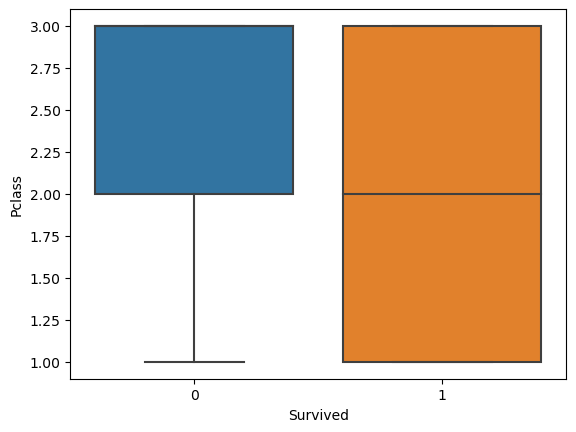

In [22]:
#To identify outliers in Survival rate using Box plot

sns.boxplot(x="Survived",y="Pclass",data=df)
plt.show()

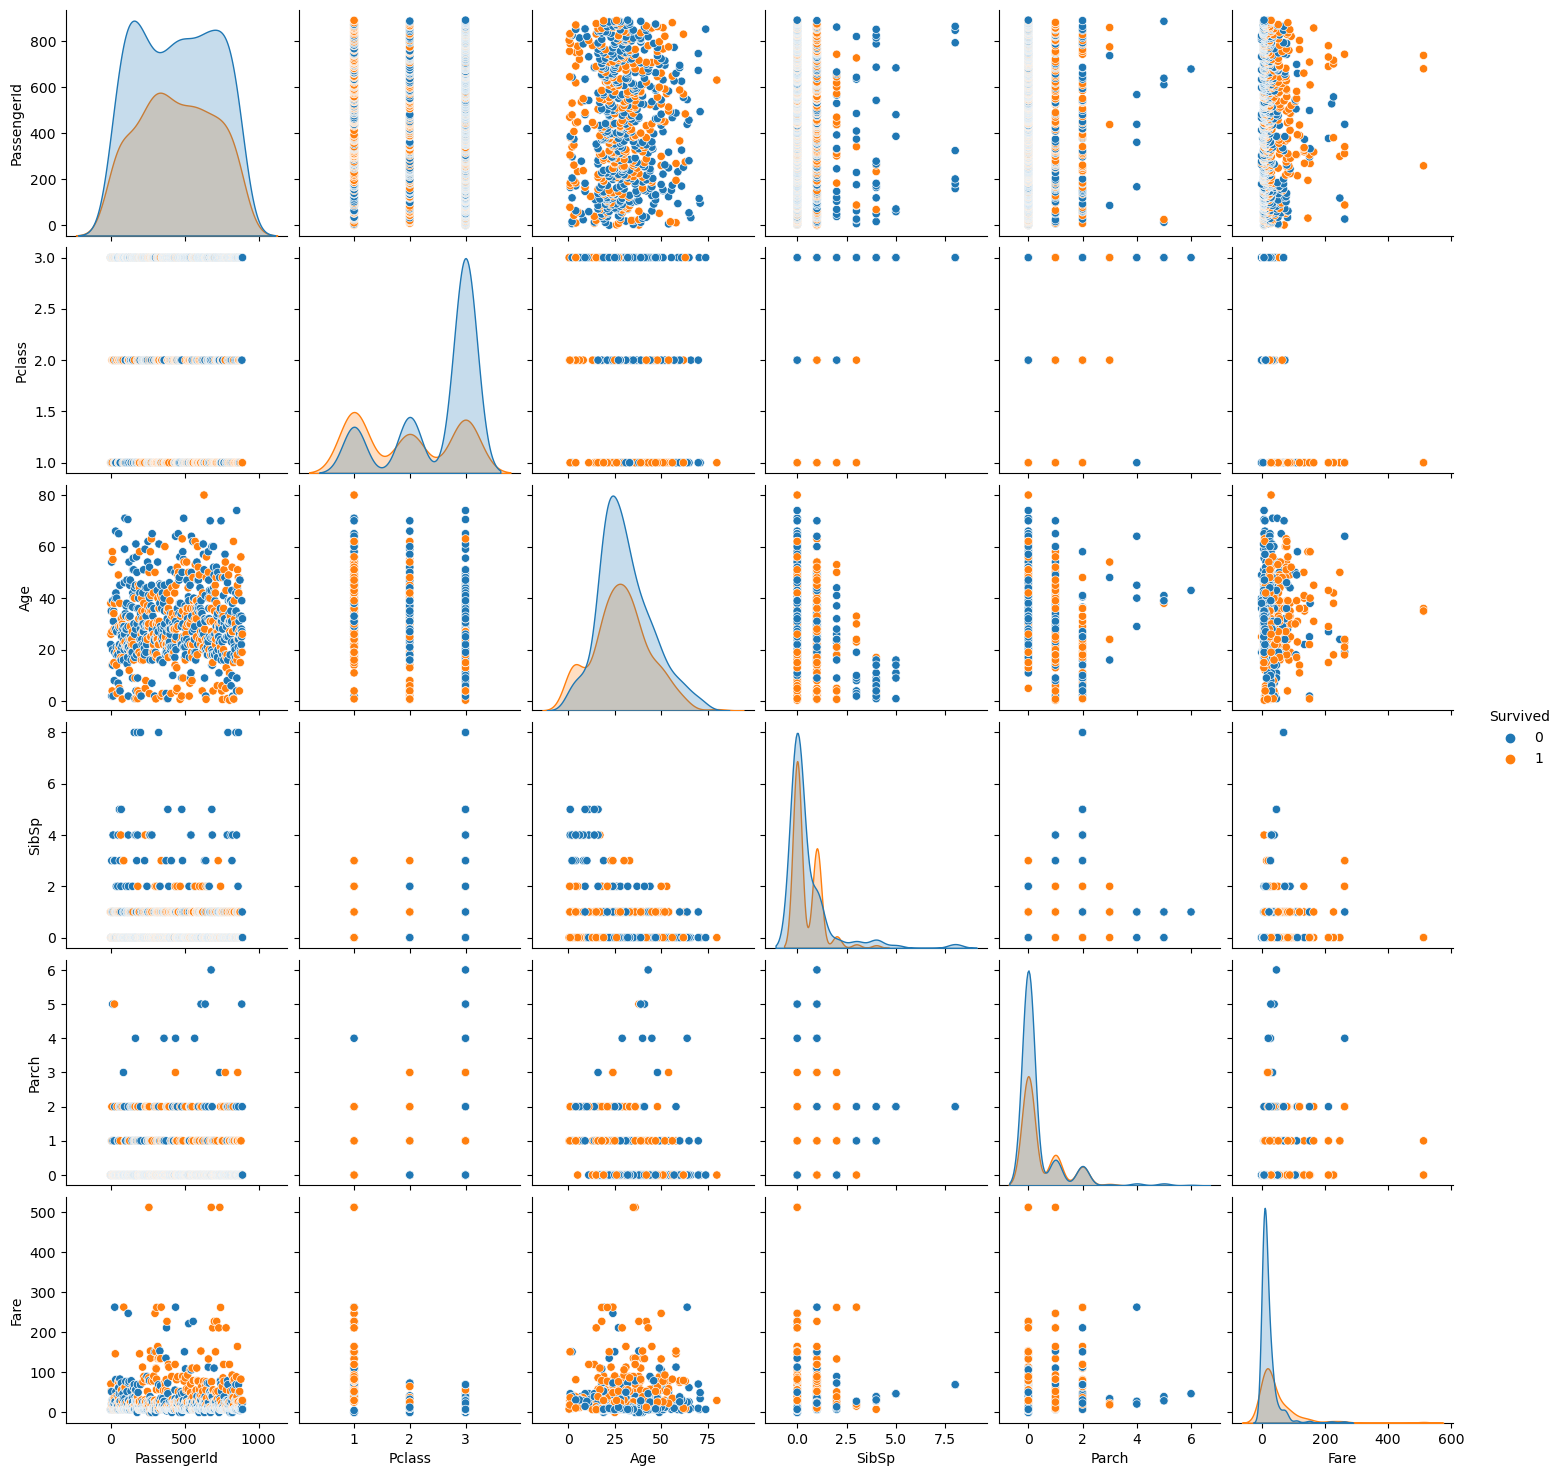

In [23]:
#To check the correlation between attributes and survival rate using pair plot

sns.pairplot(df,hue="Survived")
plt.show()

In [24]:
#Statistical data about the dataset

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
#Remove the least required columns

df.drop(["PassengerId","Name","SibSp","Parch","Ticket","Fare","Cabin","Embarked"],axis=1,inplace=True)

In [26]:
df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [27]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

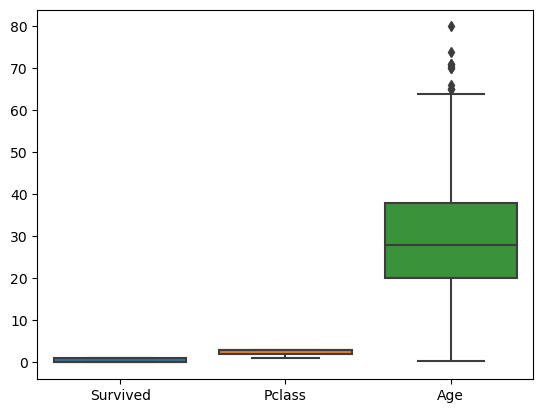

In [28]:
#Identify the outliers by boxplot

sns.boxplot(data=df)
plt.show()

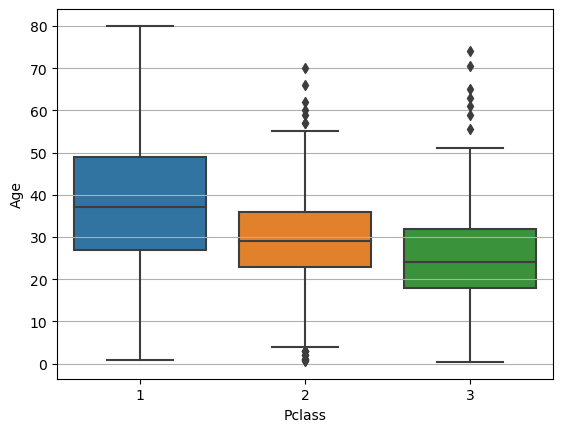

In [29]:
plt.grid()
sns.boxplot(x="Pclass",y="Age",data=df)
plt.show()

In [30]:
#Function to handle the missing values

def fillage(cols):
    Age=cols[0]
    Pclass=cols[1]
    if(pd.isnull(Age)):
        if(Pclass)==1:
            return 38
        elif(Pclass)==2:
            return 29
        else:
            return 24
    else:
        return Age

In [31]:
df["Age"]=df[["Age","Pclass"]].apply(fillage,axis=1)

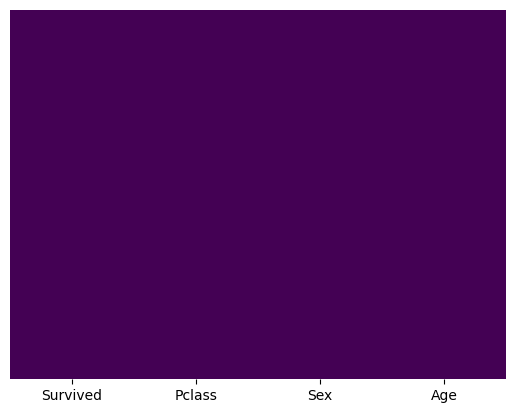

In [32]:
#Check the presence of missing values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

In [33]:
#feature=df.iloc[:,1:]

In [34]:
#target=df["Survived"]

In [35]:
#feature.head()

In [36]:
#target.head()

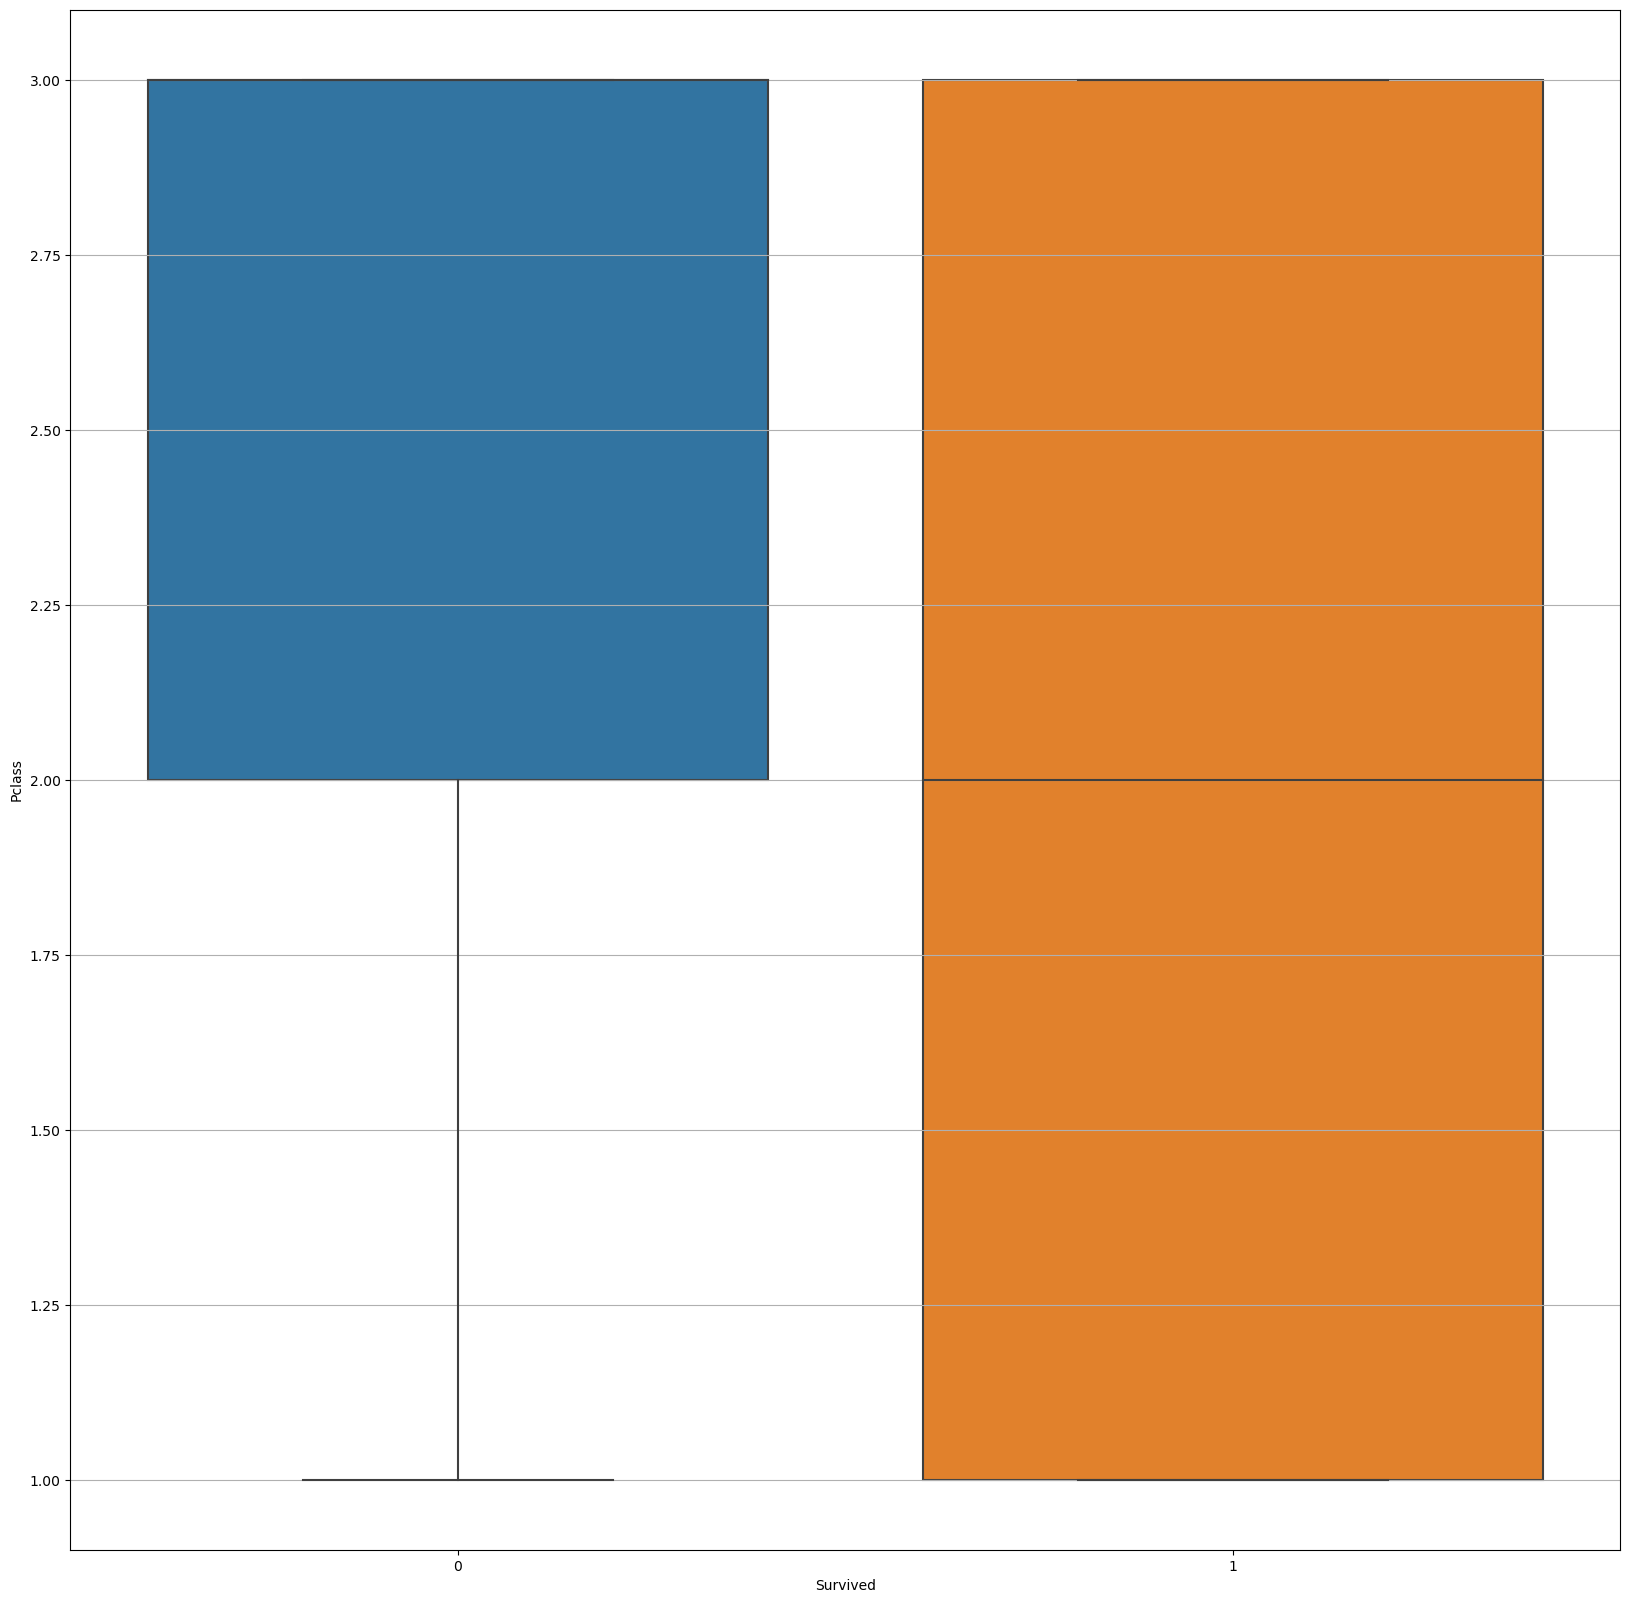

In [37]:
#Identify outliers using boxplot

plt.figure(figsize=(20,20))
plt.grid()
sns.boxplot(data=df,x="Survived",y="Pclass")
plt.show()

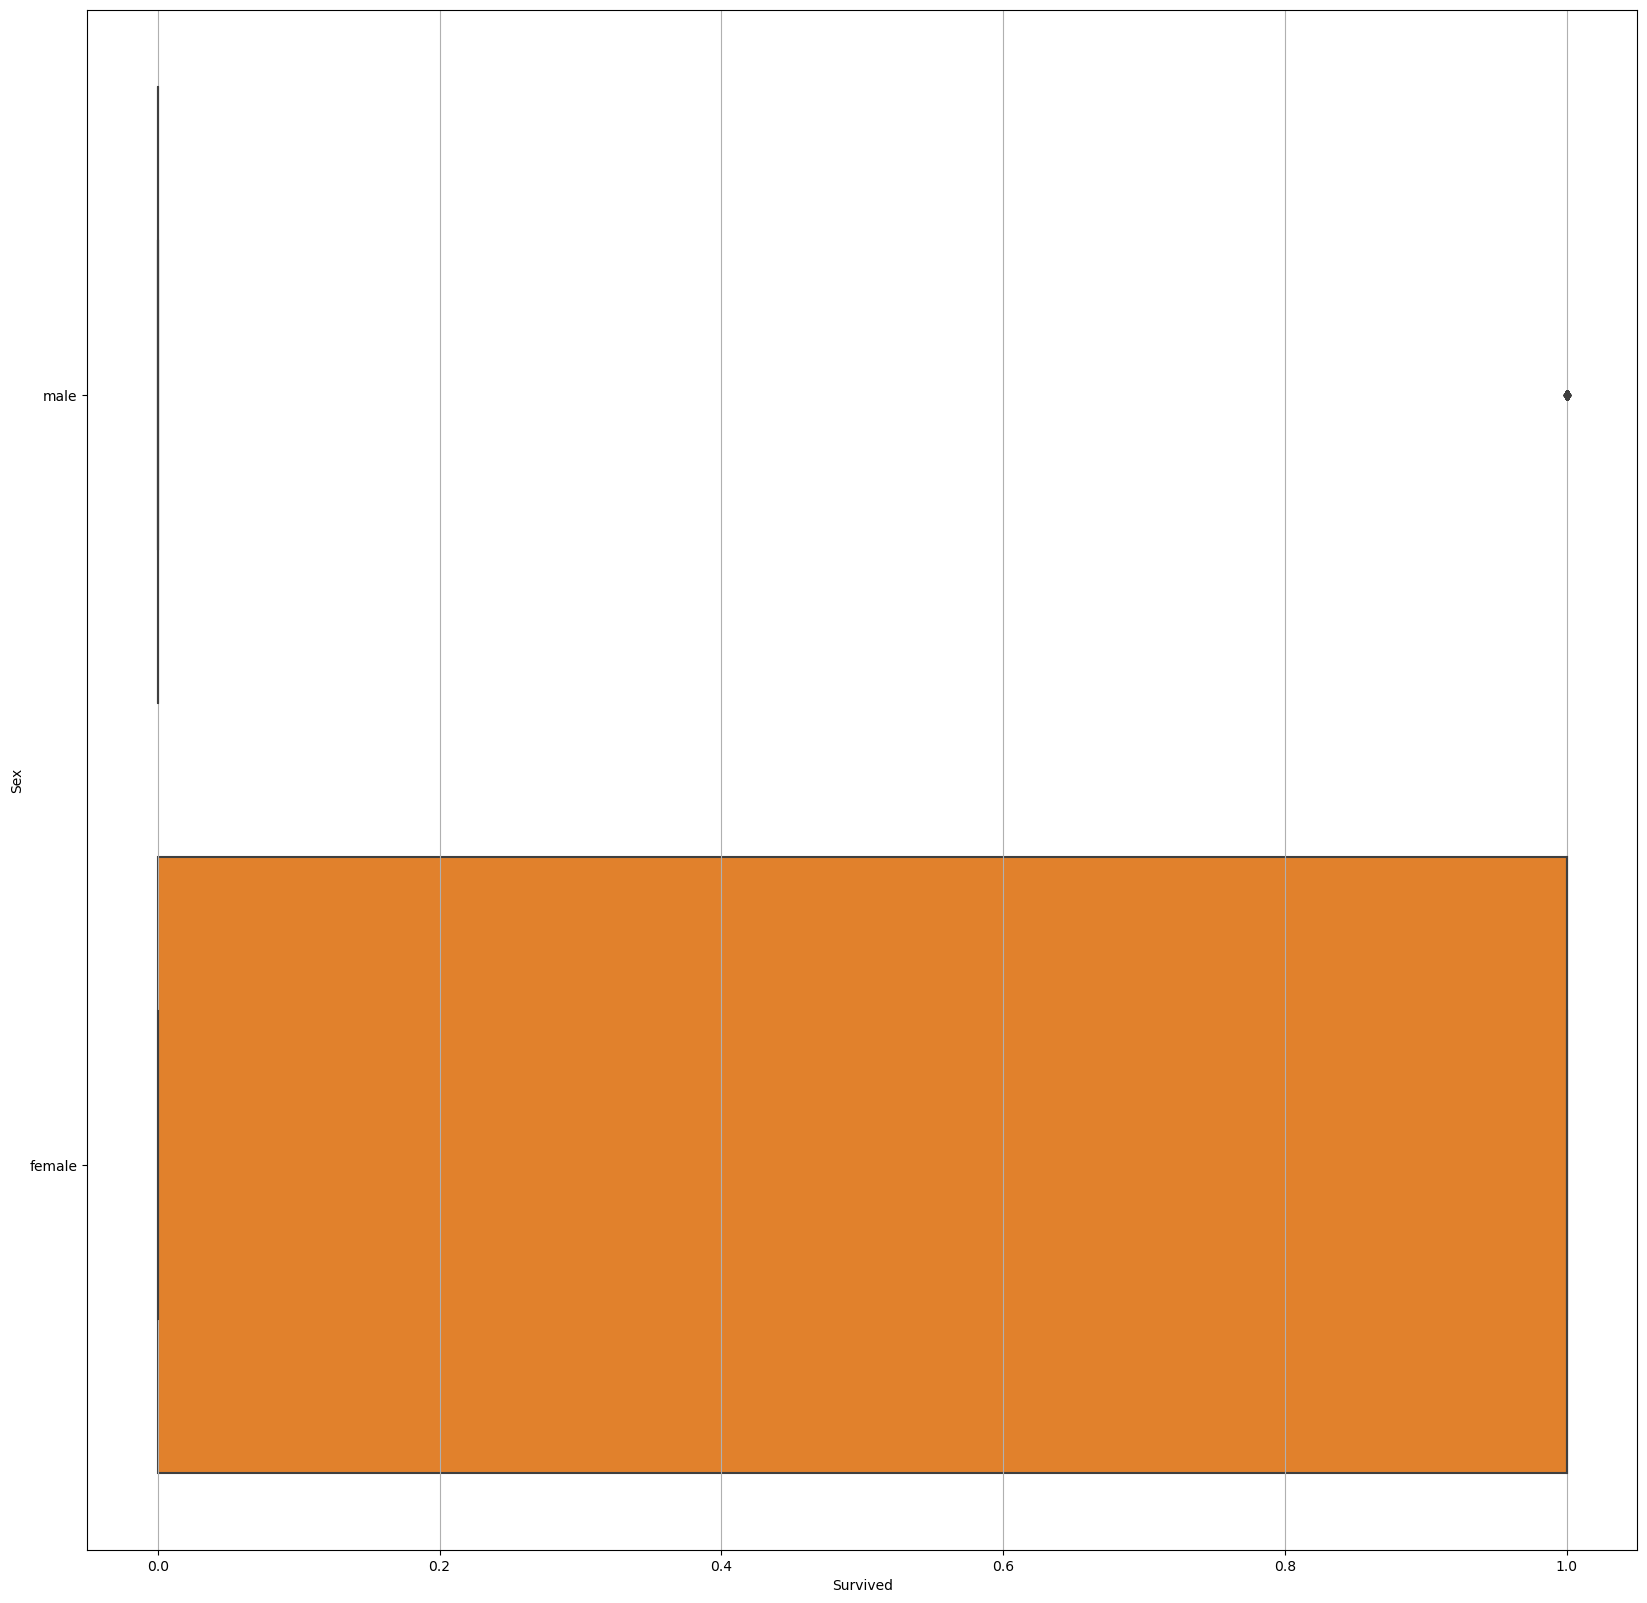

In [38]:
plt.figure(figsize=(20,20))
plt.grid()
sns.boxplot(data=df,x="Survived",y="Sex")
plt.show()

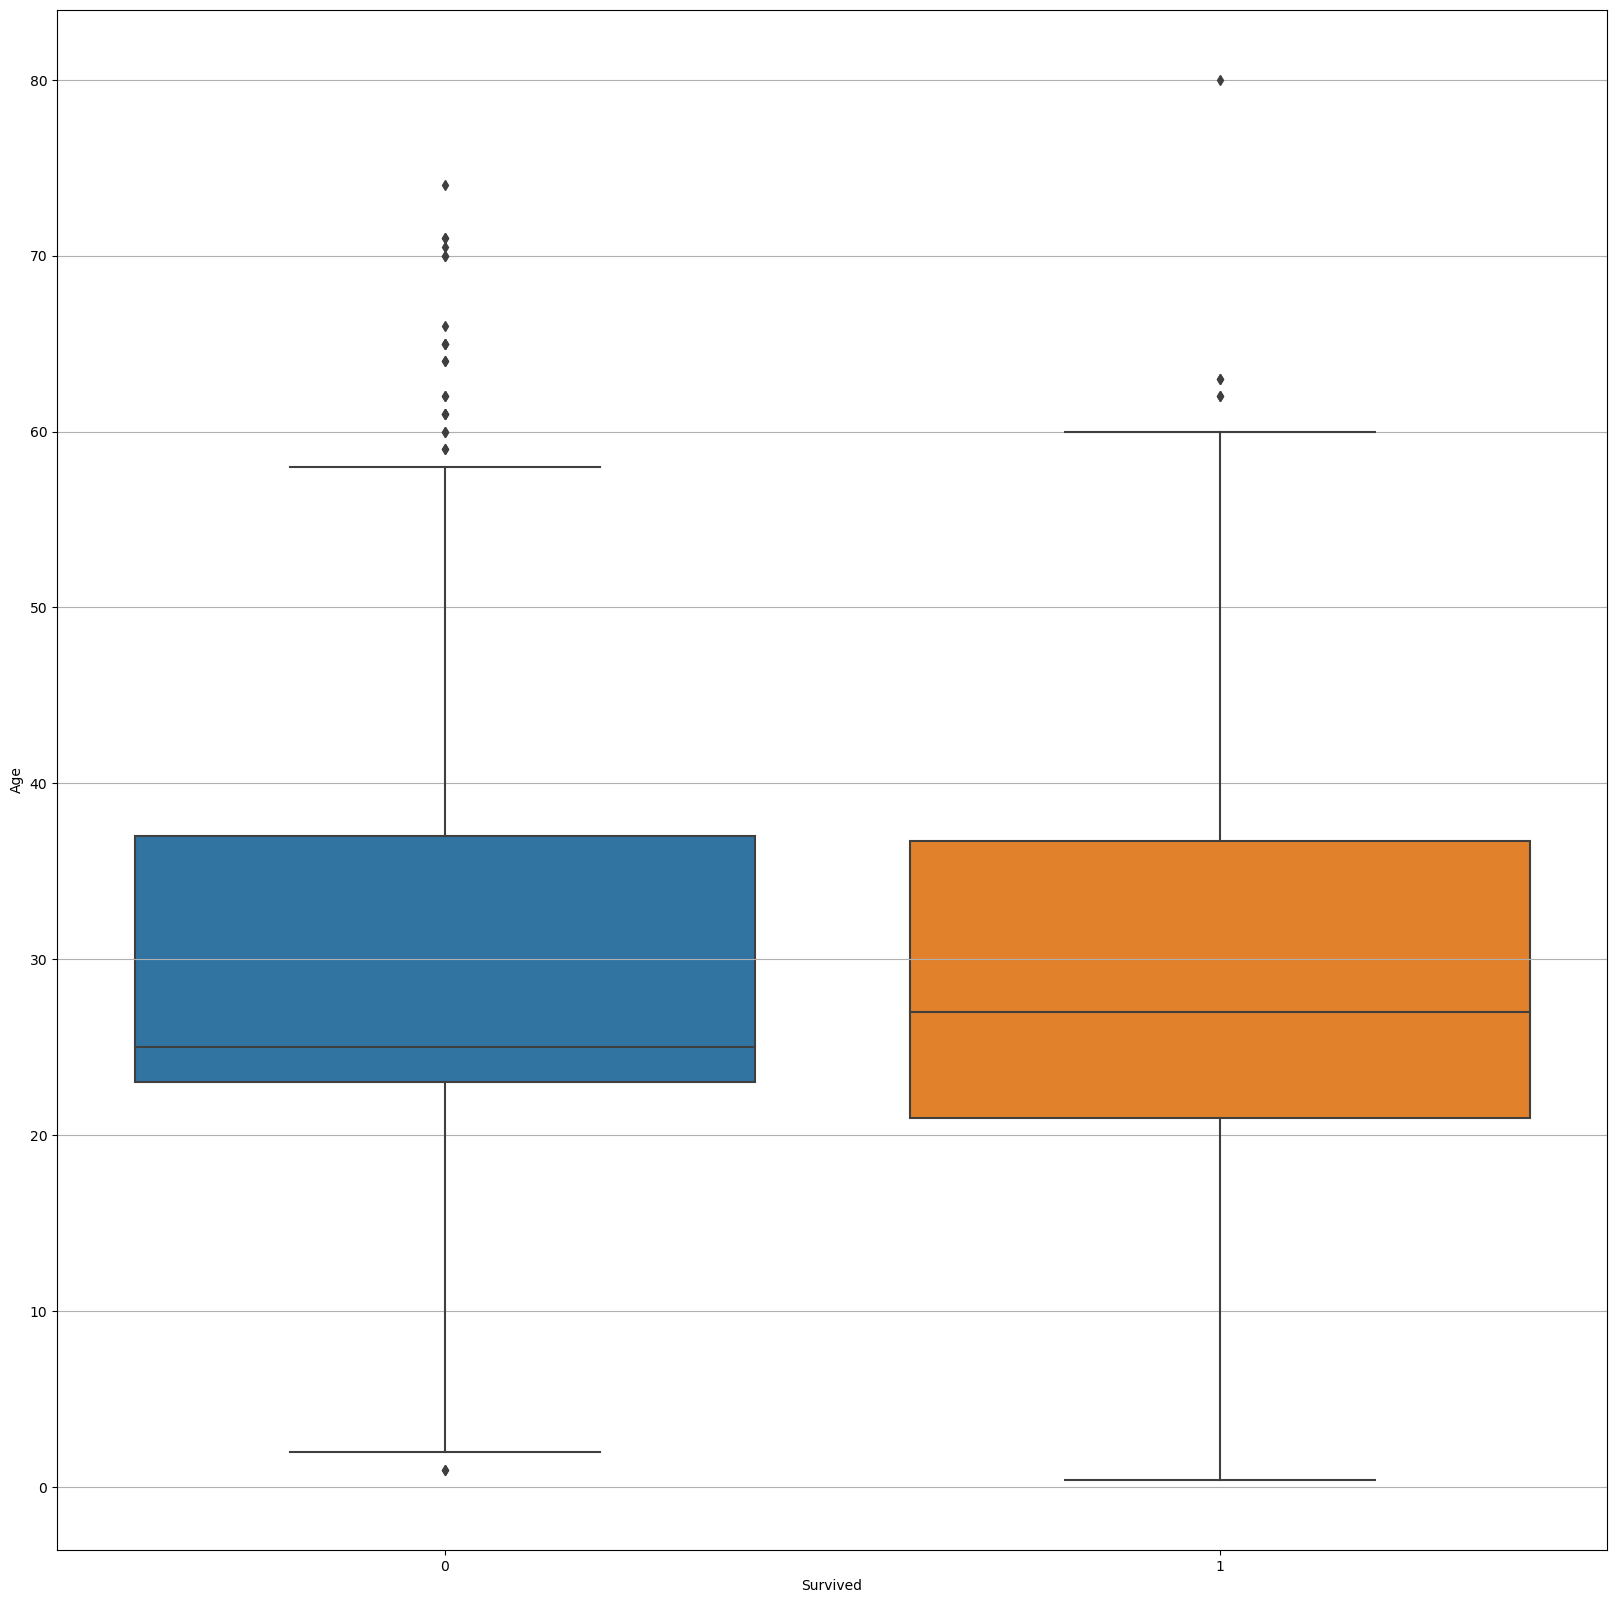

In [39]:
plt.figure(figsize=(20,20))
plt.grid()
sns.boxplot(data=df,x="Survived",y="Age")
plt.show()

In [40]:
#Identify upper outliers in the "Age" column in deceased group

df[(df["Survived"]==0)&(df["Age"]>58)]

,Survived,Pclass,Sex,Age
33,0,2,male,66.0
54,0,1,male,65.0
94,0,3,male,59.0
96,0,1,male,71.0
116,0,3,male,70.5
170,0,1,male,61.0
232,0,2,male,59.0
252,0,1,male,62.0
280,0,3,male,65.0
326,0,3,male,61.0


In [41]:
#Handling the upper outliers by replacing the with upper whisker value

df.loc[[33,54,94,96,116,170,232,252,280,326,438,456,493,545,555,625,672,684,694,745,851],"Age"]=58

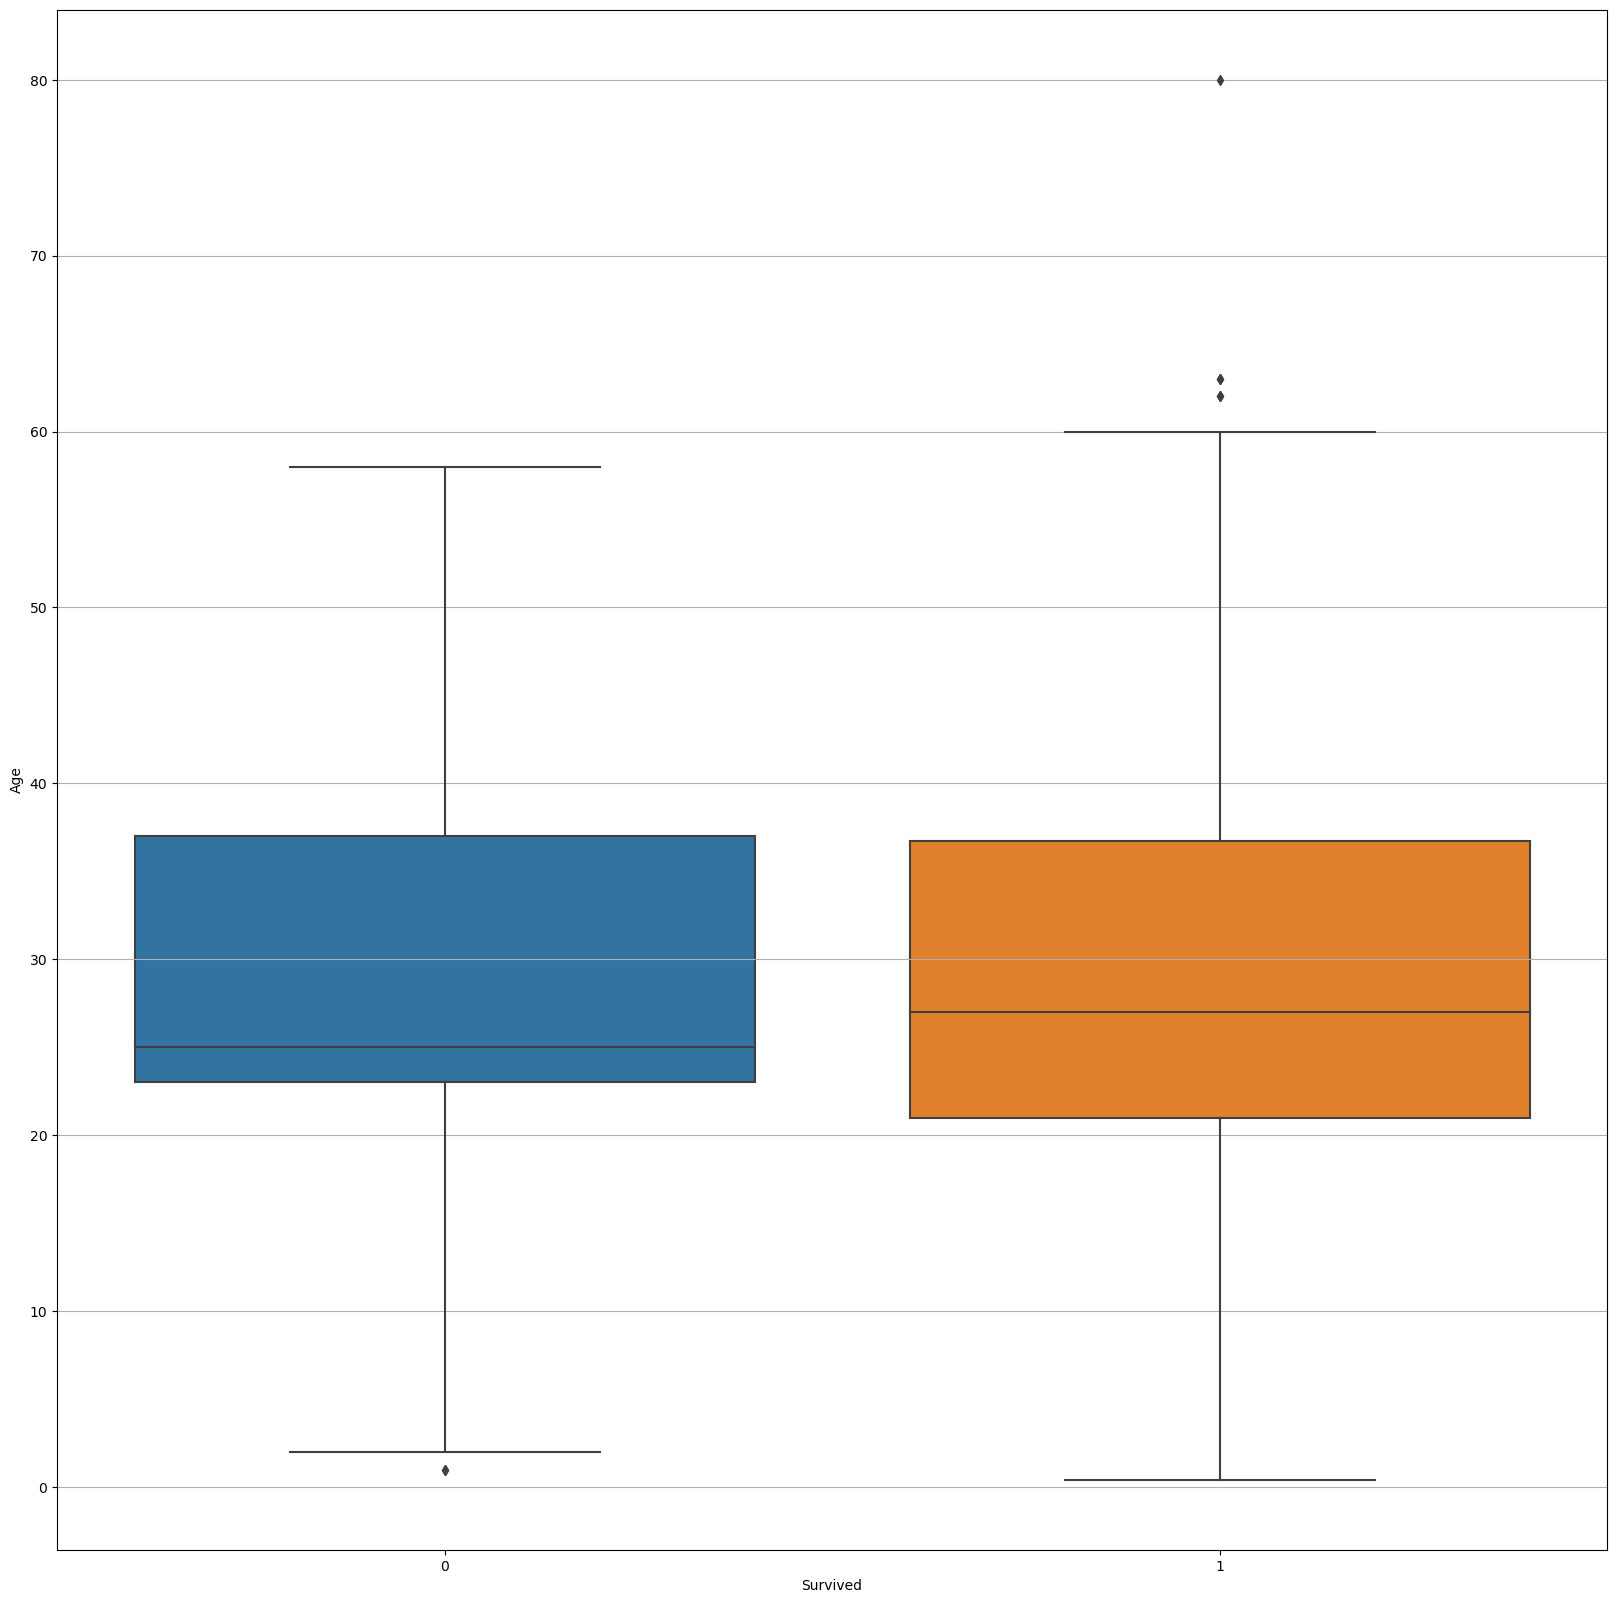

In [42]:
plt.figure(figsize=(20,20))
plt.grid()
sns.boxplot(data=df,x="Survived",y="Age")
plt.show()

In [43]:
#Identify the lower outliers in the Age column

df[(df["Survived"]==0)&(df["Age"]<2)]

,Survived,Pclass,Sex,Age
164,0,3,male,1.0
386,0,3,male,1.0


In [44]:
#Handling the lower outliers by replacing with lower whisker values

df.loc[[164,386],"Age"]=2

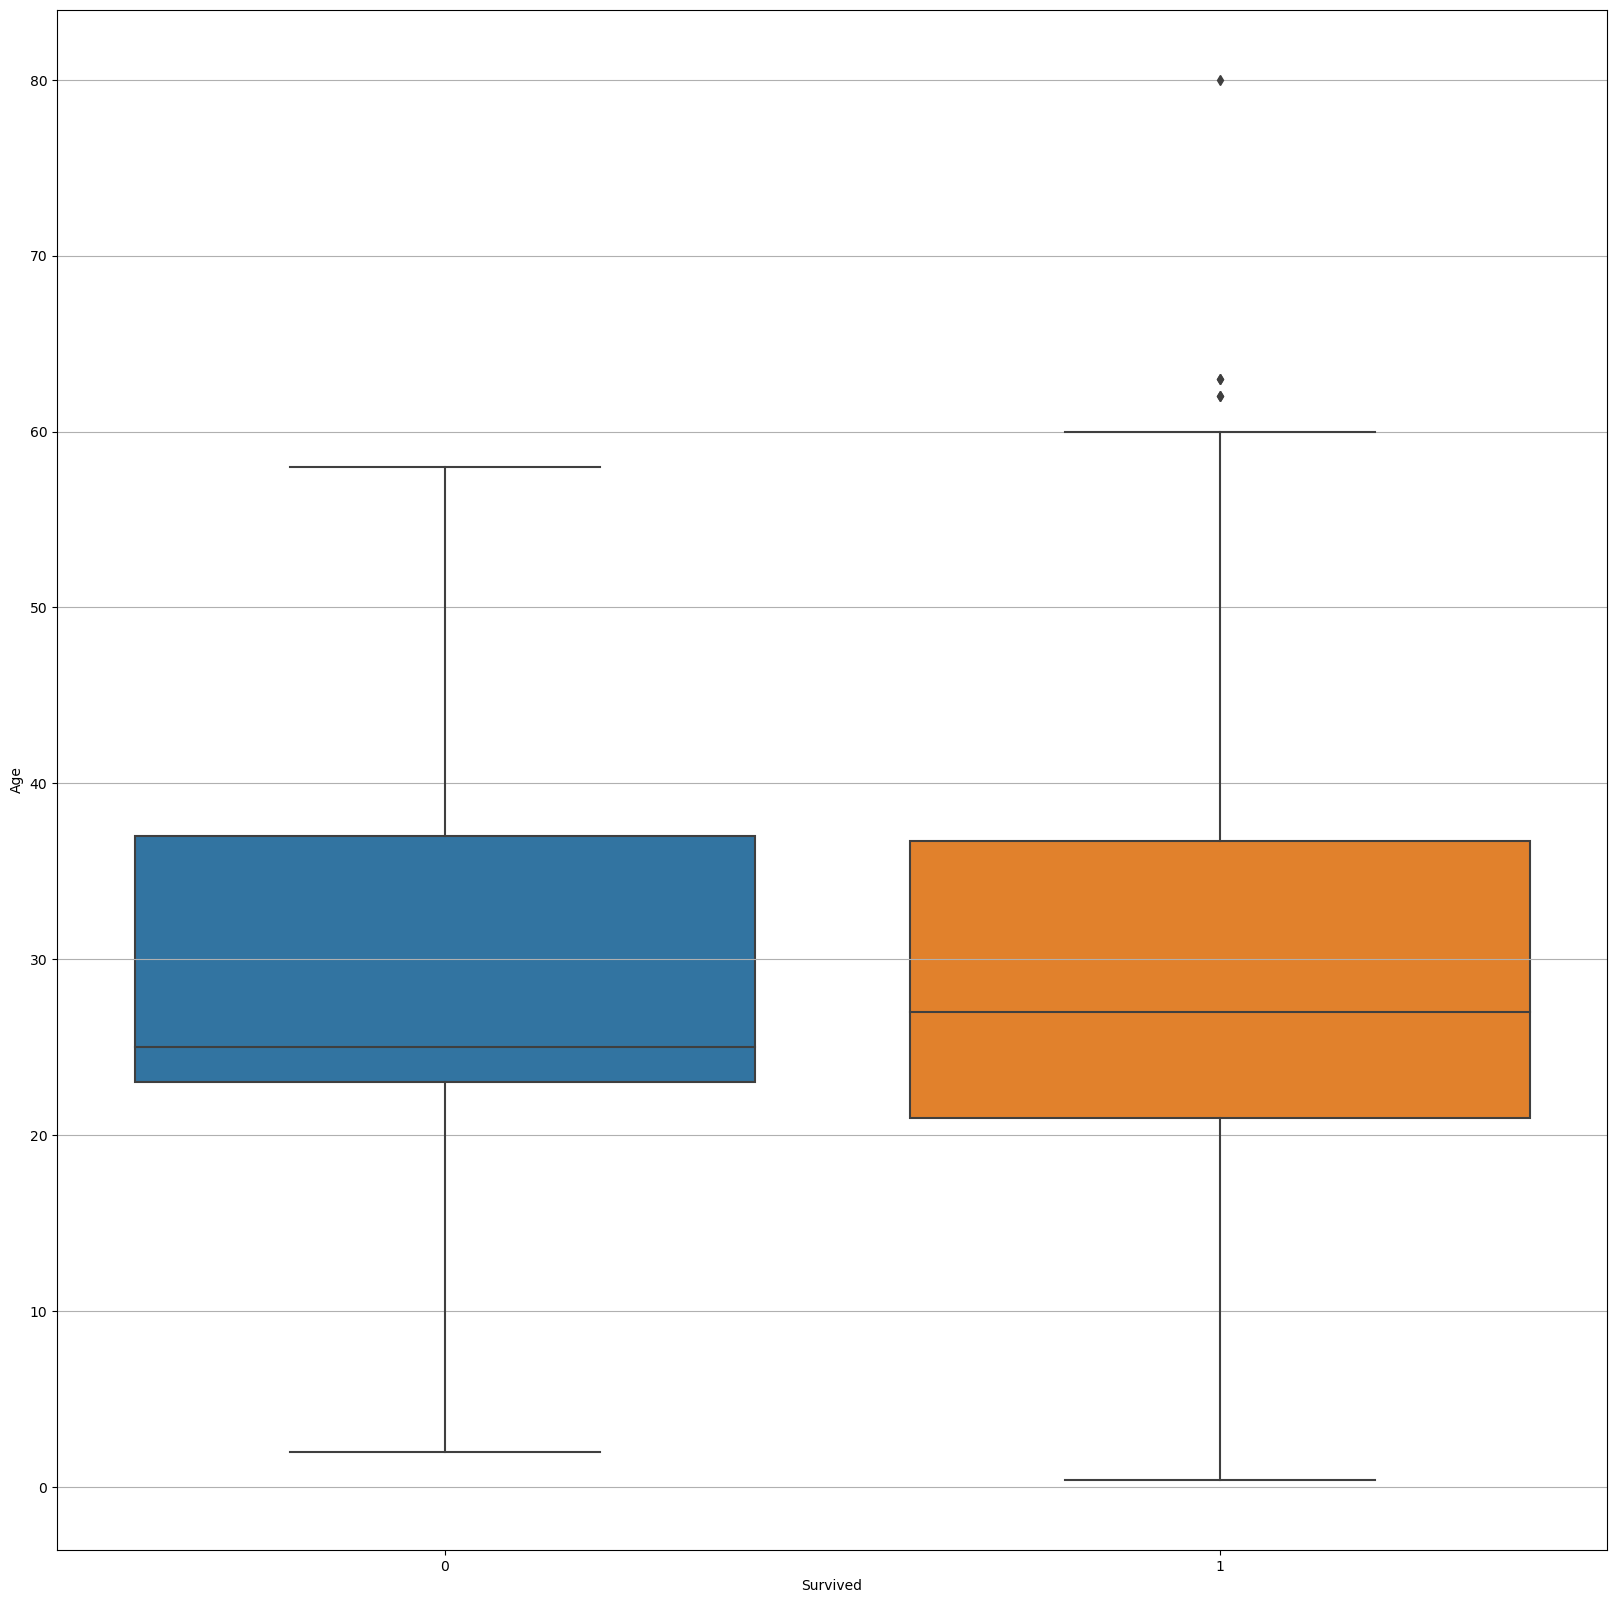

In [45]:
plt.figure(figsize=(20,20))
plt.grid()
sns.boxplot(data=df,x="Survived",y="Age")
plt.show()

In [46]:
#Identify upper outliers in the "Age" column in survived group

df[(df["Survived"]==1)&(df["Age"]>60)]

,Survived,Pclass,Sex,Age
275,1,1,female,63.0
483,1,3,female,63.0
570,1,2,male,62.0
630,1,1,male,80.0
829,1,1,female,62.0


In [47]:
df.loc[[275,483,570,630,829],"Age"]=60

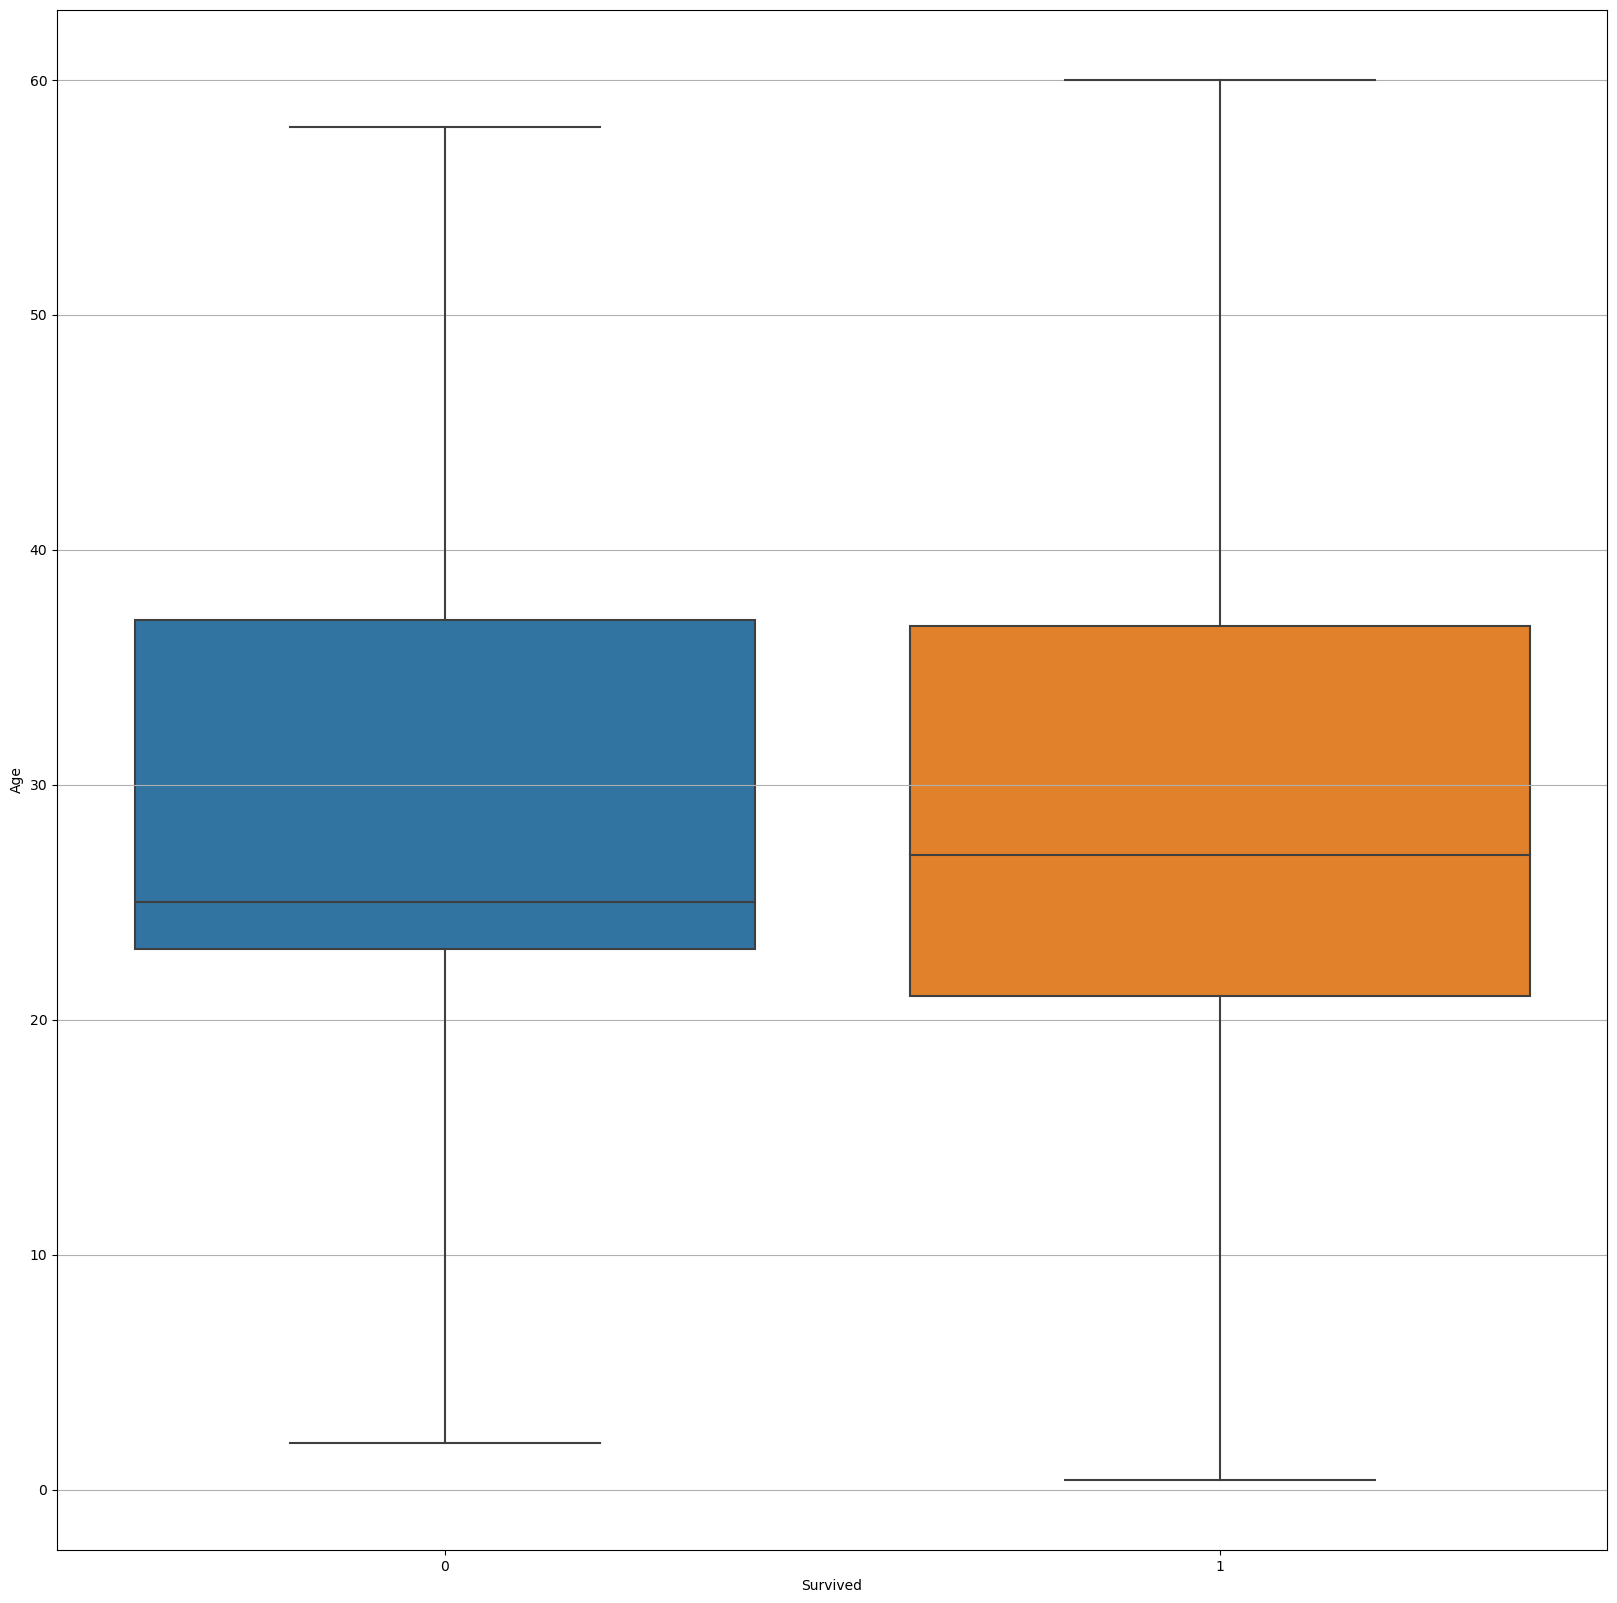

In [48]:
plt.figure(figsize=(20,20))
plt.grid()
sns.boxplot(data=df,x="Survived",y="Age")
plt.show()

In [49]:
#Seggregating the input and output data

feature=df.iloc[:,1:]

In [50]:
print(feature)

     Pclass     Sex   Age
0         3    male  22.0
1         1  female  38.0
2         3  female  26.0
3         1  female  35.0
4         3    male  35.0
..      ...     ...   ...
886       2    male  27.0
887       1  female  19.0
888       3  female  24.0
889       1    male  26.0
890       3    male  32.0

[891 rows x 3 columns]


In [51]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

In [52]:
target=df["Survived"]

In [53]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [54]:
#Encoding the Gender column of input data using Ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder

In [55]:
oe=OrdinalEncoder()

In [56]:
feature=oe.fit_transform(feature)

In [57]:
print(feature)

[[ 2.  1. 28.]
 [ 0.  0. 51.]
 [ 2.  0. 34.]
 ...
 [ 2.  0. 31.]
 [ 0.  1. 34.]
 [ 2.  1. 42.]]
